# altered file (space separated) for MK

In [9]:
cd MK_data/mk_txt/

[Error 3] The system cannot find the path specified: u'MK_data/mk_txt/'
C:\Users\zangs\Desktop\speech-exp-diuss\MK_data\mk_txt


In [10]:
pwd

u'C:\\Users\\zangs\\Desktop\\speech-exp-diuss\\MK_data\\mk_txt'

In [62]:
pwd

u'C:\\Users\\zangs\\Desktop\\speech-exp-diuss\\motif_disc\\MK\\Database Version'

In [11]:
#see original csv file and if they match with altered file

def read_MK_file(inputfile):
    #numbers only each line
    if inputfile.endswith('.csv'):
        sep=','
    elif inputfile.endswith('.txt'):
        sep=' '
    f=open(inputfile,'r').read().split('\n')
    total=[]
    for k in range(len(f)):
        line=f[k]
        #print k
        if line!='':
            l=line.split(sep)
            l=[float(i) for i in l]
            total.append(l)
    return total




In [12]:
txt_file='downsample_syl_2_meta_100_MK.txt'
total_num=read_MK_file(txt_file)

In [105]:
csv_file='original_ver/downsample_syl_3_meta_100.csv'
csv_file='original_ver/downsample_1_meta_100.csv'
n,a=read_csv_ori_file(csv_file)

In [70]:
print len(n),len(a)

48499 48499


In [71]:
print a[:4]

[['4', 'syl_csv_norm_meta/CHJ000001_voiced', '0'], ['3', 'syl_csv_norm_meta/CHJ000001_voiced', '1'], ['1', 'syl_csv_norm_meta/CHJ000001_voiced', '2'], ['1', 'syl_csv_norm_meta/CHJ000001_voiced', '3']]


In [100]:
attr=np.load('downsample_syl_2_meta_200_MK_10_tuple_attr.npy')

In [102]:
attr[125]

array([['30', 'mid_mid', 'syl_csv_norm_whole_meta/SUC000436_whole', '1_2'],
       ['30', 'mid_mid', 'syl_csv_norm_whole_meta/CHJ000164_whole', '1_2']], 
      dtype='|S39')

In [59]:
a="0.382,0.381,0.379,0.378,0.376,43,syl_csv_norm_meta/CHJ000001_voiced,0"
pat_label=r',\d?\d,'
m=re.search(pat_label,a)
m.start()

29

In [103]:
def read_csv_ori_file(csv_file):
    #each line has numbers and string attributes
    f=open(csv_file,'r').read().split('\n')
    all_attributes=[]
    all_pitch=[]
    for k in range(len(f)):
        line=f[k]
        #print k
        if line!='':
            #l=line.split(',')
            #get numbers and get attributes
            pat_label=r',\d+,'
            m=re.search(pat_label,line)
            num_end=m.start()
            numbers=line[:num_end]
            attributes=line[num_end+1:]
            num_list=numbers.split(',')
            attr_list=attributes.split(',')
            fl_num=[float(i) for i in num_list]
            all_pitch.append(fl_num)
            all_attributes.append(attr_list)
    return all_pitch,all_attributes

In [57]:
a[29:]

',4,syl_csv_norm_meta/CHJ000001_voiced,0'

In [58]:
a[:29]

'0.382,0.381,0.379,0.378,0.376'

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

## extract best-so-far

In [15]:
cd "C:/Users/zangs/Desktop/speech-exp-diuss/motif_disc/MK/Database Version/"

C:\Users\zangs\Desktop\speech-exp-diuss\motif_disc\MK\Database Version


In [16]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CEE9-8BD1

 Directory of C:\Users\zangs\Desktop\speech-exp-diuss\motif_disc\MK\Database Version

12/23/2016  05:49 PM    <DIR>          .
12/23/2016  05:49 PM    <DIR>          ..
12/21/2016  04:21 PM            13,992 a.out
10/07/2008  12:02 AM             6,768 BF_d.cpp
10/07/2008  12:02 AM            30,516 BF_d.exe
08/29/2008  04:09 PM        16,386,000 d.txt
12/23/2016  05:55 PM            79,557 downsample_syl_2_meta_100_MK_log.txt
12/23/2016  05:55 PM             5,549 downsample_syl_2_meta_100_MK_tuple.txt
12/21/2016  04:21 PM            10,539 mk_d.cpp
10/06/2008  09:07 PM            34,252 mk_d.exe
12/23/2016  04:06 PM            59,443 mk_output.txt
12/23/2016  11:39 PM    <DIR>          mk_txt
10/07/2008  09:05 AM             1,015 Readme.txt
12/23/2016  11:38 PM             2,916 run_MK_db.py
12/23/2016  05:32 PM             2,363 try_output.txt
              12 File(s)     16,632,910 bytes
               3 Dir(s)  

In [17]:
test="New best-so-far is 2.113712 and (116 , 1798) are the new motif pair"
import re
dist_pat=r'\d*\.\d+'
dist_pair=r'\d+ , \d+'
m=re.search(dist_pat,test)
n=re.search(dist_pair,test)
print m.group()
print n.group()

2.113712
116 , 1798


In [19]:
g=open('mk_output.txt','r').read().split('\n')
print g[12]

New best-so-far is 4.113712 and (116 , 1798) are the new motif pair


In [20]:
g=open('mk_output.txt','r').read().split('\n')

dist_pat=r'\d*\.\d+'
dist_pair=r'\d+ , \d+'
groups=[]
for line in g:
    this_group=[]
    if line!="":
        if line.startswith('New best-so-far'): 
            m=re.search(dist_pat,line)
            n=re.search(dist_pair,line)
            if m:
                this_group.append(float(m.group()))
            if n:
                this_group.append((int(n.group().split(',')[0])))
                this_group.append((int(n.group().split(',')[1])))
            groups.append(this_group)                      
        #if line.startswith("Number of Time Series"):
         #   print "\n=============\n"

sort_groups=sorted(groups,key=lambda x: x[0])       

outfile='MK_MotifPairs_bigram_100.csv'
f=open(outfile,'w')
f.write('distance,ts1,ts2\n')
f.close()
f=open(outfile,'a')
for run in sort_groups:
    run_float=[str(i) for i in run]
    line=','.join(run_float)
    f.write(line+'\n')
f.close()

    

In [21]:
for item in sort_groups:
    print item

[0.023611, 19282, 24576]
[0.027628, 8617, 52211]
[0.032653, 25244, 19113]
[0.032653, 19113, 25244]
[0.032653, 25244, 19113]
[0.062034, 52250, 52249]
[0.067555, 19282, 60536]
[0.081188, 54106, 18791]
[0.082958, 14209, 8878]
[0.111288, 43837, 58359]
[0.112575, 18791, 24384]
[0.15957, 46341, 29742]
[0.163088, 8920, 52249]
[0.164002, 14379, 24384]
[0.177108, 16847, 12383]
[0.195734, 12254, 2716]
[0.218112, 958, 2716]
[0.23806, 41095, 25556]
[0.242664, 53710, 77614]
[0.265051, 8399, 8878]
[0.266899, 10157, 24384]
[0.308992, 8482, 24384]
[0.336003, 41095, 85933]
[0.343886, 11781, 17275]
[0.349673, 77167, 19088]
[0.355491, 64139, 361]
[0.3562, 15533, 43]
[0.356549, 808, 2716]
[0.381053, 24207, 26602]
[0.409932, 83118, 11662]
[0.416265, 12155, 26602]
[0.457566, 525, 27406]
[0.46196, 1989, 610]
[0.498622, 60414, 361]
[0.501734, 49378, 3173]
[0.508357, 57690, 361]
[0.516489, 8502, 15723]
[0.517584, 10041, 26602]
[0.531086, 22462, 20093]
[0.541702, 28706, 15936]
[0.547961, 84423, 10257]
[0.560215

In [72]:
mts=sort_groups[:10]

In [73]:
mts

[[0.023611, 19282, 24576],
 [0.027628, 8617, 52211],
 [0.032653, 25244, 19113],
 [0.032653, 19113, 25244],
 [0.032653, 25244, 19113],
 [0.062034, 52250, 52249],
 [0.067555, 19282, 60536],
 [0.081188, 54106, 18791],
 [0.082958, 14209, 8878],
 [0.111288, 43837, 58359]]

In [75]:
seen=[]
for i in mts:
    if set(i) not in seen:
        seen.append(set(i))
        

In [76]:
seen

[{0.023611, 19282, 24576},
 {0.027628, 8617, 52211},
 {0.032653, 19113, 25244},
 {0.062034, 52249, 52250},
 {0.067555, 19282, 60536},
 {0.081188, 18791, 54106},
 {0.082958, 8878, 14209},
 {0.111288, 43837, 58359}]

In [83]:

def read_tuple_file(tuple_file):
    f=open(tuple_file,'r').read().split('\n')
    total=[]
    for line in f[1:]:
        if line!='':
            l=line.split(',')
            total.append(l)
    return total

def get_unique_tuples(tuples_list):
    seen=[]
    unique=[]
    for i in tuples_list:
        if set(i) not in seen:
            seen.append(set(i))
            unique.append(i)
    return unique

In [84]:
input_file='mk_txt/downsample_syl_2_meta_100_MK_10_tuple.txt'
motif_tuples=read_tuple_file(input_file)
motif_tuples_unique=get_unique_tuples(motif_tuples)

In [85]:
motif_tuples_unique

[['0.032653', '19113', '25244'],
 ['0.045509', '62395', '60335'],
 ['0.067555', '19282', '60536'],
 ['0.07138', '16767', '62395'],
 ['0.0817', '12125', '46341'],
 ['0.084771', '51760', '56794'],
 ['0.086423', '26549', '10157'],
 ['0.093633', '12125', '56793'],
 ['0.111634', '10259', '25244'],
 ['0.136321', '15533', '16500'],
 ['0.138959', '62037', '46799'],
 ['0.155707', '73002', '72614'],
 ['0.173645', '51022', '70835'],
 ['0.176007', '77614', '46321'],
 ['0.179977', '18923', '55621'],
 ['0.212046', '18791', '10157'],
 ['0.21322', '19114', '63403'],
 ['0.214417', '51842', '11938'],
 ['0.214862', '17275', '24589'],
 ['0.219937', '51842', '51022'],
 ['0.246518', '62161', '24861'],
 ['0.251535', '1263', '47130'],
 ['0.251709', '14379', '10157'],
 ['0.253618', '17349', '1823'],
 ['0.273452', '8482', '10157'],
 ['0.275098', '36212', '52212'],
 ['0.288232', '39153', '16779'],
 ['0.297708', '26546', '8413'],
 ['0.3152', '76646', '54109'],
 ['0.324841', '10645', '16779'],
 ['0.330377', '18791

In [ ]:
tuple()

### observations

this is done with #Ref=100

1. each time it is not guarranteed to find the top motif. 
2. what if we put the three numbers into a tuple and just sort according to dist.
3. however, each time the trajectory of the motif discovery depends on the reference points.This can be clearly seen from the mk_output.txt log.Despite this fact, it is still interesting if we pool them and sort them, since each time it tends to find a different motif.
4. to better understand this we can read the MK paper again.

## bigram motifs(100)

In [44]:
def get_attributes(index_array):
    #get the attributes for a pair of motifs, e.g.
    all_attr=[]
    for idx in index_array:
        print total_ori[idx][-4:]
        all_attr.append(total_ori[idx][-4:])
    return all_attr

##### some top motifs

distance,ts1,ts2

0.027628,8617,52211

0.032653,25244,19113

0.032653,19113,25244

0.062034,52250,52249

0.067555,19282,60536


0.081188,54106,18791

0.082958,14209,8878

0.111288,43837,58359

0.112575,18791,24384

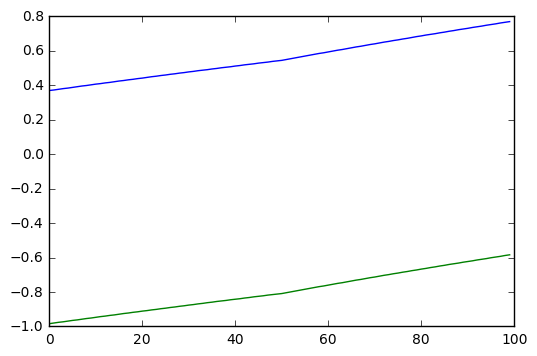

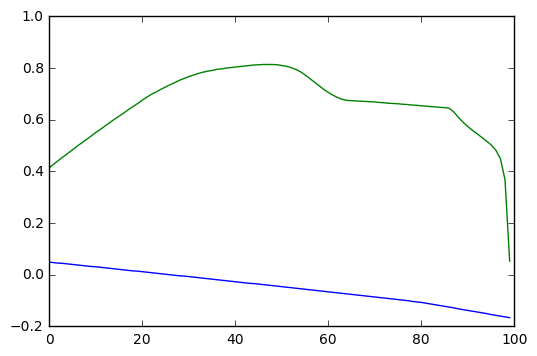

['43', 'mid_mid', 'syl_csv_norm_whole_meta/FAJ000066_whole', '23_24']
['02', 'mid_mid', 'syl_csv_norm_whole_meta/FAJ000944_whole', '16_17']


In [32]:
plt.plot(total_num[19113])
plt.plot(total_num[25244])
plt.show()
plt.plot(total_num[18791])
plt.plot(total_num[23484])
plt.show()
pair=[19113,25244]
get_attributes(pair)


In [39]:
total_num[:10]

[[0.548,
  0.545,
  0.541,
  0.536,
  0.529,
  0.517,
  0.5,
  0.485,
  0.475,
  0.469,
  0.464,
  0.46,
  0.457,
  0.455,
  0.453,
  0.452,
  0.452,
  0.452,
  0.454,
  0.458,
  0.462,
  0.466,
  0.471,
  0.475,
  0.478,
  0.48,
  0.481,
  0.481,
  0.481,
  0.48,
  0.479,
  0.478,
  0.477,
  0.476,
  0.476,
  0.475,
  0.475,
  0.475,
  0.476,
  0.476,
  0.476,
  0.475,
  0.475,
  0.474,
  0.472,
  0.471,
  0.469,
  0.468,
  0.466,
  0.465,
  0.464,
  0.464,
  0.463,
  0.462,
  0.461,
  0.459,
  0.456,
  0.452,
  0.449,
  0.384,
  0.382,
  0.378,
  0.375,
  0.238,
  0.235,
  0.231,
  0.228,
  0.226,
  0.227,
  0.229,
  0.232,
  0.235,
  0.238,
  0.241,
  0.243,
  0.245,
  0.249,
  0.253,
  0.256,
  0.257,
  0.255,
  0.253,
  0.251,
  0.249,
  0.249,
  0.249,
  0.25,
  0.252,
  0.255,
  0.257,
  0.259,
  0.26,
  0.26,
  0.258,
  0.256,
  0.254,
  0.252,
  0.251,
  0.25,
  0.251],
 [0.239,
  0.237,
  0.235,
  0.232,
  0.229,
  0.227,
  0.226,
  0.227,
  0.228,
  0.229,
  0.232,
  0.235,


In [40]:
pair[1]

52211

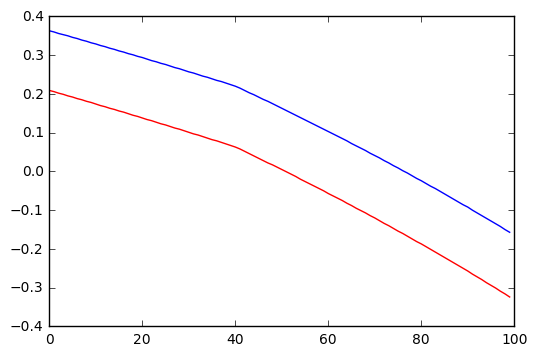

['44', 'mid_mid', 'syl_csv_norm_whole_meta/DIL000042_whole', '13_14']
['43', 'mid_mid', 'syl_csv_norm_whole_meta/WAJ000120_whole', '5_6']


In [45]:
pair=[8617,52211]
def peek(pair):
    #f, axarr = plt.subplots(1,2)
    #axarr[0, 0].plot(total_num[pair[1]])
    #axarr[0, 1].plot(total_num[pair[0]])
    plt.plot(total_num[pair[0]],'r')
    plt.plot(total_num[pair[1]],'b')
    plt.show()
    all_attr=get_attributes(pair)
peek(pair)

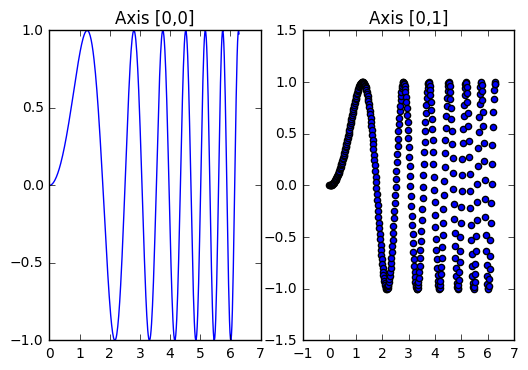

In [53]:
# Simple data to display in various forms
import numpy as np
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(1, 2)
axarr[0].plot(x, y)
axarr[0].set_title('Axis [0,0]')

axarr[1].scatter(x, y)
axarr[1].set_title('Axis [0,1]')


In [90]:
np.save('total_ori.npy',total_ori)

In [91]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CEE9-8BD1

 Directory of C:\Users\zangs\Desktop\speech-exp-diuss\motif_disc\MK\Database Version

12/25/2016  04:33 PM    <DIR>          .
12/25/2016  04:33 PM    <DIR>          ..
12/21/2016  04:21 PM            13,992 a.out
10/07/2008  12:02 AM             6,768 BF_d.cpp
10/07/2008  12:02 AM            30,516 BF_d.exe
08/29/2008  04:09 PM        16,386,000 d.txt
12/23/2016  05:55 PM            79,557 downsample_syl_2_meta_100_MK_log.txt
12/23/2016  05:55 PM             5,549 downsample_syl_2_meta_100_MK_tuple.txt
12/25/2016  03:59 PM           427,051 histograms.pdf
12/21/2016  04:21 PM            10,539 mk_d.cpp
10/06/2008  09:07 PM            34,252 mk_d.exe
12/24/2016  11:15 AM             3,774 MK_MotifPairs_bigram_100.csv
12/23/2016  04:06 PM            59,443 mk_output.txt
12/24/2016  05:28 PM    <DIR>          mk_txt
12/25/2016  11:05 AM    <DIR>          mk_txt_test
12/25/2016  02:56 PM               956 multi_page_ori.

In [92]:
som=np.load('total_ori.npy')

In [97]:
total_ori

([[0.548,
   0.545,
   0.541,
   0.536,
   0.529,
   0.517,
   0.5,
   0.485,
   0.475,
   0.469,
   0.464,
   0.46,
   0.457,
   0.455,
   0.453,
   0.452,
   0.452,
   0.452,
   0.454,
   0.458,
   0.462,
   0.466,
   0.471,
   0.475,
   0.478,
   0.48,
   0.481,
   0.481,
   0.481,
   0.48,
   0.479,
   0.478,
   0.477,
   0.476,
   0.476,
   0.475,
   0.475,
   0.475,
   0.476,
   0.476,
   0.476,
   0.475,
   0.475,
   0.474,
   0.472,
   0.471,
   0.469,
   0.468,
   0.466,
   0.465,
   0.464,
   0.464,
   0.463,
   0.462,
   0.461,
   0.459,
   0.456,
   0.452,
   0.449,
   0.384,
   0.382,
   0.378,
   0.375,
   0.238,
   0.235,
   0.231,
   0.228,
   0.226,
   0.227,
   0.229,
   0.232,
   0.235,
   0.238,
   0.241,
   0.243,
   0.245,
   0.249,
   0.253,
   0.256,
   0.257,
   0.255,
   0.253,
   0.251,
   0.249,
   0.249,
   0.249,
   0.25,
   0.252,
   0.255,
   0.257,
   0.259,
   0.26,
   0.26,
   0.258,
   0.256,
   0.254,
   0.252,
   0.251,
   0.25,
   0.251],
  [0.239

In [ ]:
sort_groups[:8]

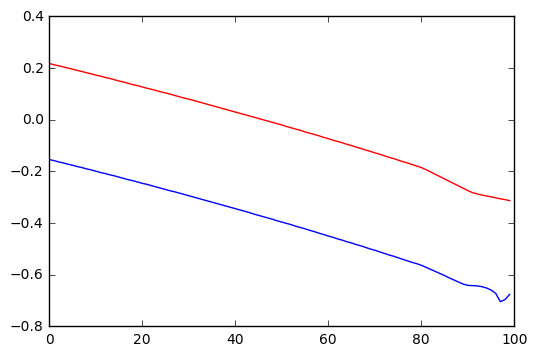

['04', 'mid_end', 'syl_csv_norm_whole_meta/RUO000407_whole', '14_15']
['40', 'mid_mid', 'syl_csv_norm_whole_meta/XUL000665_whole', '6_7']


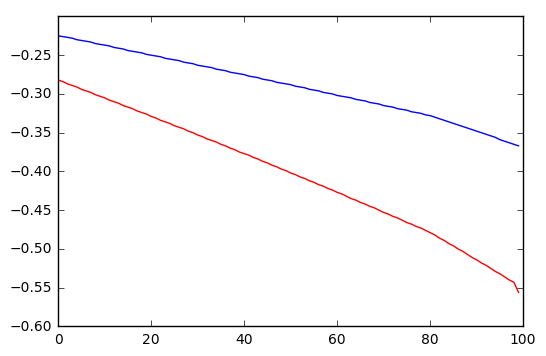

['33', 'mid_mid', 'syl_csv_norm_whole_meta/DOH000582_whole', '8_9']
['30', 'mid_mid', 'syl_csv_norm_whole_meta/FAJ000815_whole', '32_33']


In [43]:
peek(sort_groups[22][1:])
peek(sort_groups[13][1:])


['43', 'mid_mid', 'syl_csv_norm_whole_meta/FAJ000066_whole', '23_24']
['02', 'mid_mid', 'syl_csv_norm_whole_meta/FAJ000944_whole', '16_17']


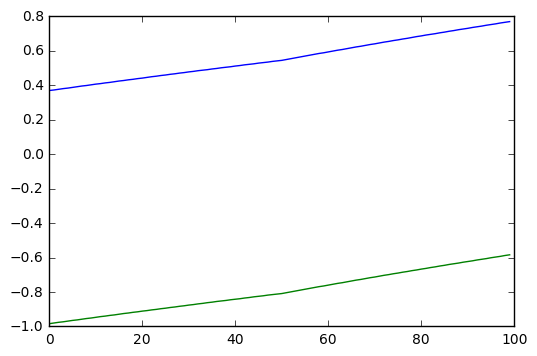

In [26]:
peek(sort_groups[3][1:])

In [ ]:
peek(sort_groups[4][1:])

In [ ]:
peek(sort_groups[5][1:])

In [ ]:
peek(sort_groups[6][1:])

In [ ]:
peek(sort_groups[7][1:])

In [ ]:
peek(sort_groups[8][1:])

In [ ]:
peek(sort_groups[9][1:])

In [ ]:
peek(sort_groups[24][1:])


At first I was suspecting why these motifs are all very linear. But it seems like the trend is that topmost motifs are very linear whereas somewhere down the ranks it will become more linear. this reminds me of the complexity of the time-series and how it will affect the distance computation.

It might seem a little lost where to go from here at first. But don't be discouraged. I think first, there are many more versions of motif discovery to run, including both Database and Subsequence mode, and different Ns, so there is enough things to talk about and will wait to see. Second you also want to probably increase value of N, and see what is the effect. Third we will need to go back to the audio and textgrid and see what is happening there and devise a general strategy for assessing motifs and find useful knowledge. Also refer to the literature on this.

probably we will need to streamline this to quickly run different versions and see the results.

## unigram motifs (voiced 100)

In [ ]:
#MK version altered
plt.plot(total[1339])
plt.plot(total[1510])

In [ ]:
#original csv
plt.plot(total[1339])
plt.plot(total[1510])

In [ ]:
#at this point, I want to see where is the original syllable from. 
ori_ver='MK_data/original_ver/downsample_1_meta_100.csv'
totalo = read_csv_ori_file(ori_ver)

In [ ]:
len(totalo)

In [ ]:
pair=[1339,1510]
get_attributes(pair)



In [ ]:
#altered
plt.plot(total[1265])
plt.plot(total[1448])

In [ ]:
#original
plt.plot(total[1265],'r')
plt.plot(total[1448])

In [ ]:
pair=[1265,1448]
get_attributes(pair)

In [ ]:
#altered
plt.plot(total[1161])
plt.plot(total[1388])

In [ ]:
#original
plt.plot(total[1161])
plt.plot(total[1388])

In [ ]:
pair=[1161,1388]
get_attributes(pair)

In [ ]:
#altered
plt.plot(total[1306])
plt.plot(total[1504])


In [ ]:
#ori
plt.plot(total[1306])
plt.plot(total[1504])

In [ ]:
pair=[1306,1504]
get_attributes(pair)

In [ ]:
plt.plot(total[666],'r')
plt.plot(total[919])

In [ ]:
pair=[666,919]
get_attributes(pair)

In [ ]:
plt.plot(total[1226])
plt.plot(total[127])

In [ ]:
pair=[1226,127]
get_attributes(pair)

In [ ]:
plt.plot(total[442])
plt.plot(total[347])

In [ ]:
pair=[442,347]
get_attributes(pair)

so far it seems like tone 4 is the most consistent, as expected, the tone 2 was a surprise. 